In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../dataframes/globalterrorism.csv", encoding = "ISO-8859-1")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
df_num = df.select_dtypes(include = ['float64'])
columns = df_num.columns

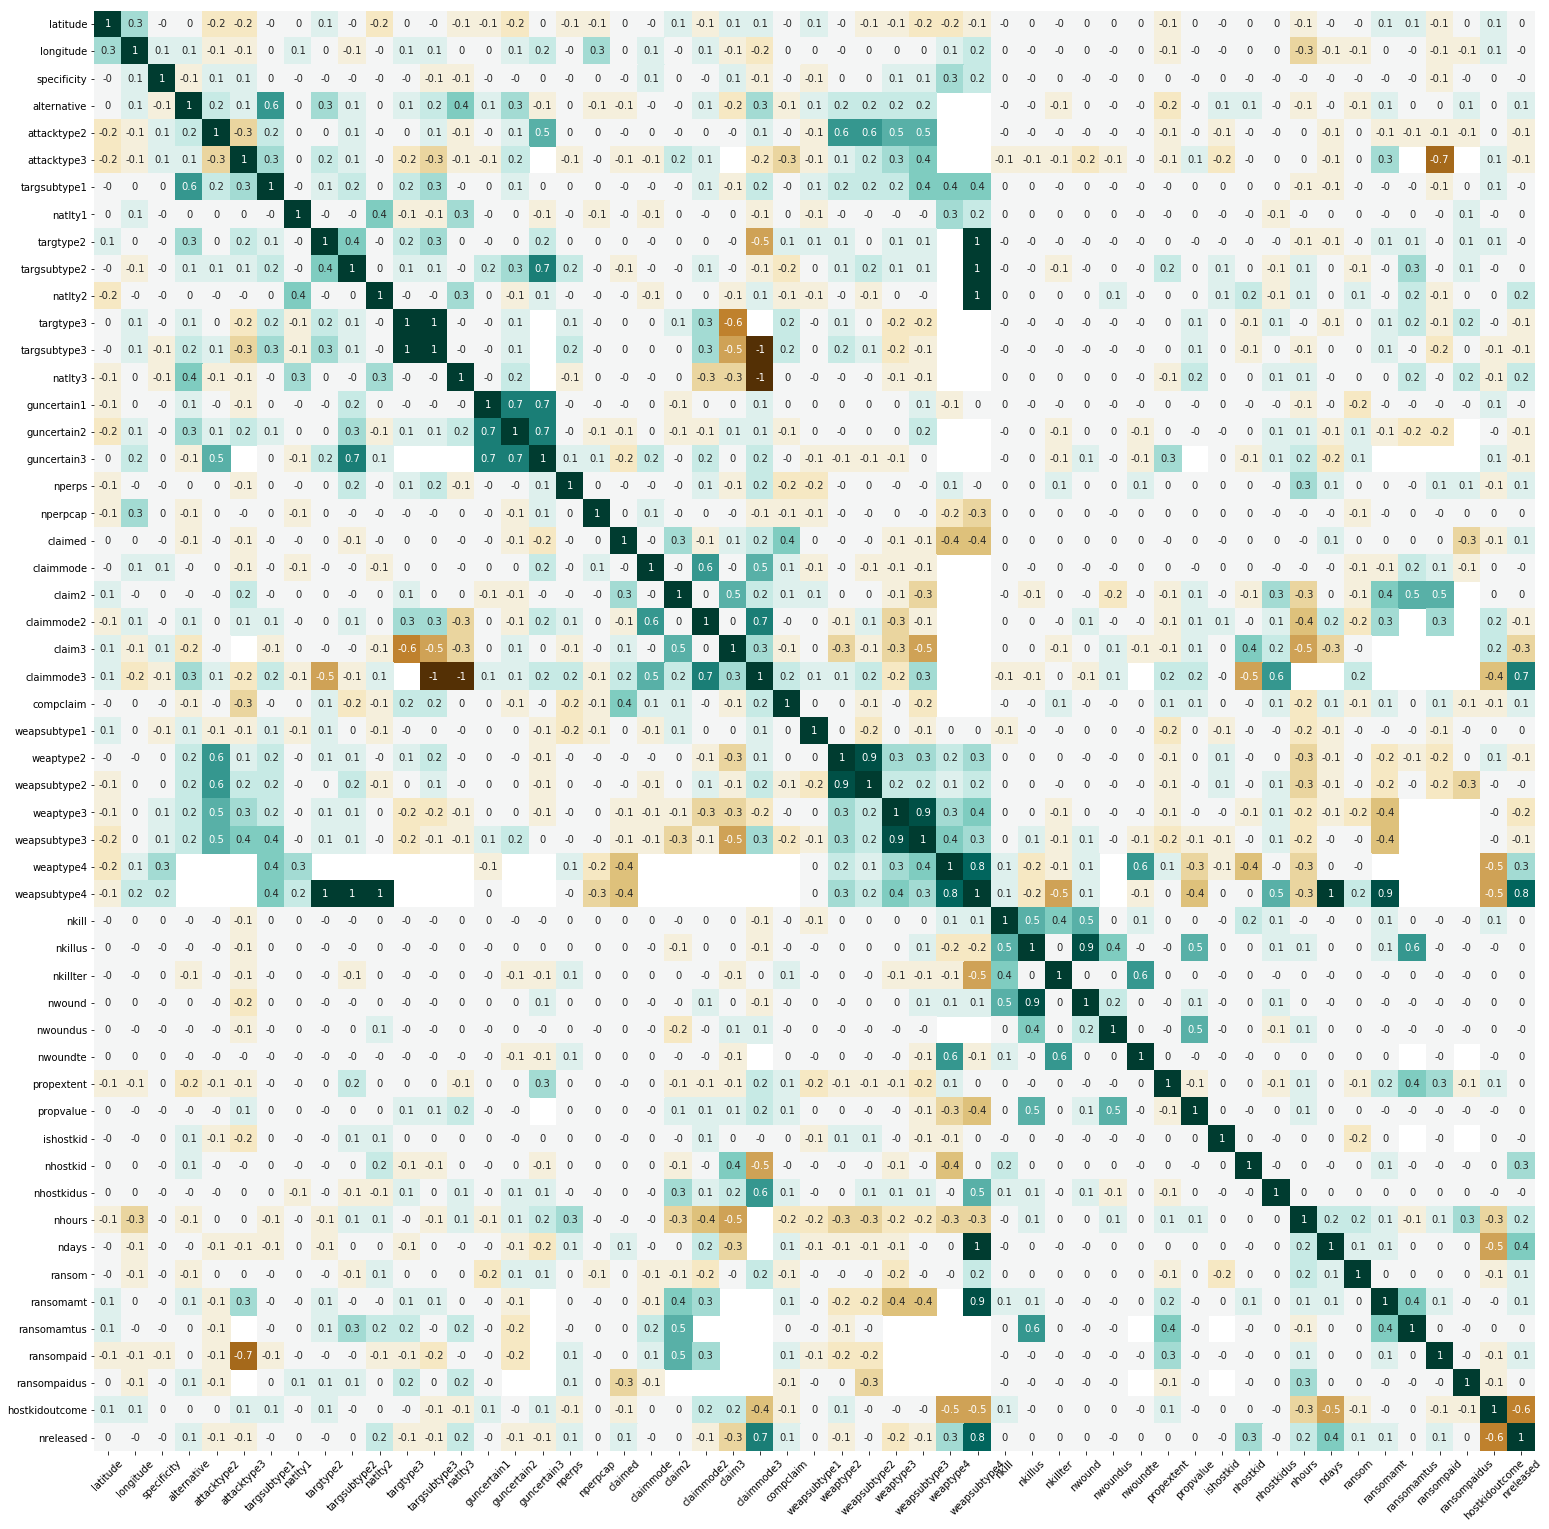

In [31]:
corr = df_num.corr().round(1)
ncols = len(df_num.columns)

plt.figure(figsize=[ncols/2,ncols/2])
sns.heatmap(corr, square=True, cmap="BrBG", vmin=-1, vmax=1, center=0, annot=True, cbar=False)
plt.xticks(rotation=45);

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'constant')
imputer = imputer.fit(df_num)
df_num = imputer.transform(df_num)

df_num = pd.DataFrame(df_num)
df_num.columns = columns

corr = df_num.corr().round(1)

In [29]:
from sklearn.cluster.bicluster import SpectralCoclustering

model = SpectralCoclustering(n_clusters=4, random_state=0)
model.fit(corr);

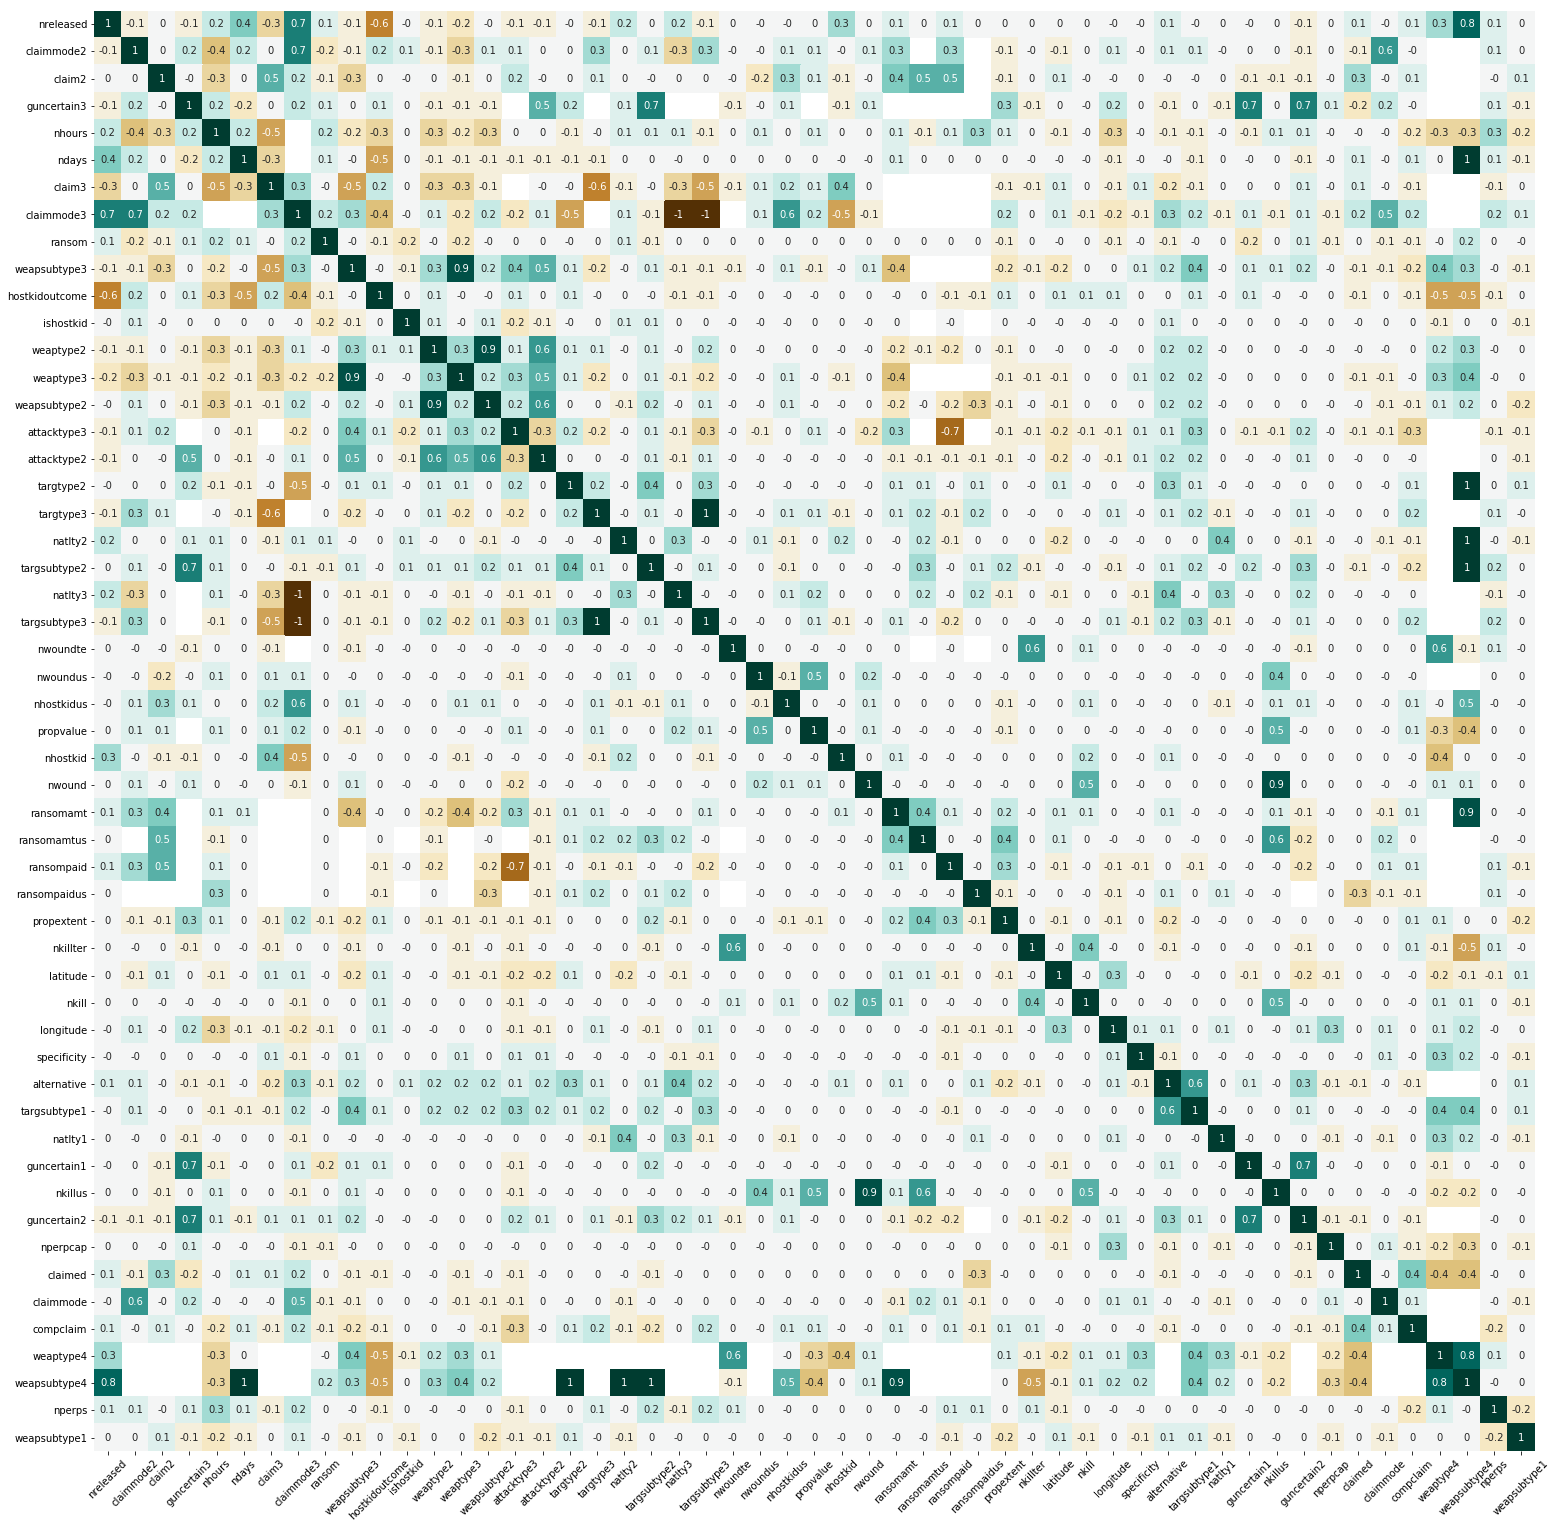

In [32]:
new_corr = corr.iloc[np.argsort(model.row_labels_), np.argsort(model.row_labels_)]

plt.figure(figsize=[ncols/2,ncols/2])
sns.heatmap(new_corr, square=True, cmap="BrBG", vmin=-1, vmax=1, center=0, annot=True, cbar=False)
plt.xticks(rotation=45);

In [ ]:
fit_data = corr[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)